# Лаб. вежба 1

Стефан Милев - 206055

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler


### Dataset

In [2]:
df = pd.read_csv("Pokemon.csv")
df


#                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1      False  
1         80       80     60           1      False  
2        100      100     80           1      False  
3        122      120     80           1      False  
4         60       50     65           1      False  
..       ...      ...    ...         ...        ...  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True  

[800 rows x 13 columns]

In [3]:
df.drop(["#"], axis=1, inplace=True)


### Data Analysis

In [4]:
df.isna().sum()


Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [5]:
df["Type 2"]


0      Poison
1      Poison
2      Poison
3      Poison
4         NaN
        ...  
795     Fairy
796     Fairy
797     Ghost
798      Dark
799     Water
Name: Type 2, Length: 800, dtype: object

In [6]:
df["Type 2"].fillna("None", inplace=True)


In [7]:
df.describe()


Total          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.00000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   435.10250   69.258750   79.001250   73.842500   72.820000   71.902500   
std    119.96304   25.534669   32.457366   31.183501   32.722294   27.828916   
min    180.00000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    330.00000   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    450.00000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    515.00000   80.000000  100.000000   90.000000   95.000000   90.000000   
max    780.00000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation  
count  800.000000   800.00000  
mean    68.277500     3.32375  
std     29.060474     1.66129  
min      5.000000     1.00000  
25%     45.000000     2.00000  
50%     65.000000     3.00000  
75%     90.000000     5.00000  
max    180.000000     6.00000

In [8]:
df["Type 1"].value_counts()


Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [9]:
df["Type 2"].value_counts()


None        386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [10]:
df["Generation"].value_counts()


1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [11]:
df["Legendary"].value_counts()


False    735
True      65
Name: Legendary, dtype: int64

### Visualization

<Axes: xlabel='Type 1', ylabel='count'>

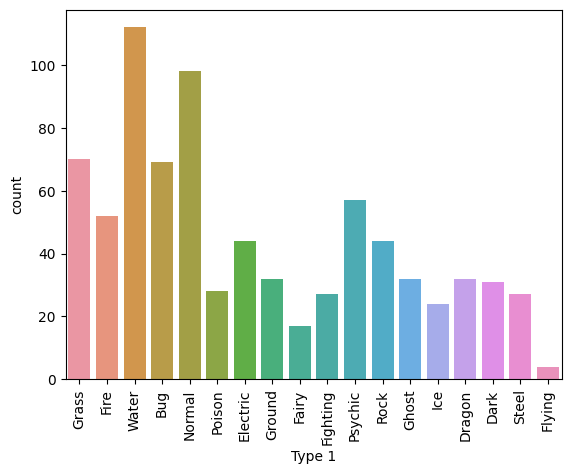

In [12]:
plt.xticks(rotation=90)
sns.countplot(df, x="Type 1")


<Axes: xlabel='Type 2', ylabel='count'>

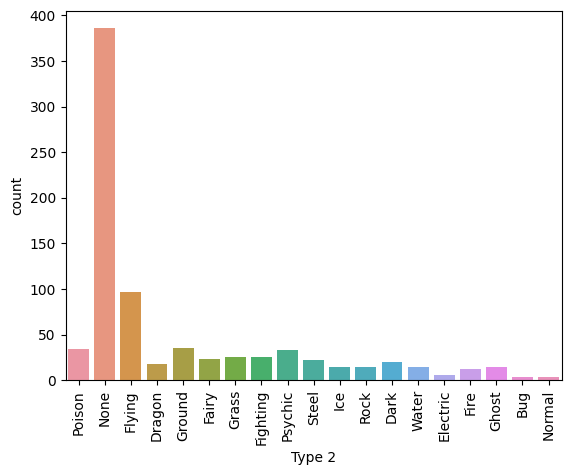

In [13]:
plt.xticks(rotation=90)
sns.countplot(df, x="Type 2")


<Axes: xlabel='Generation', ylabel='count'>

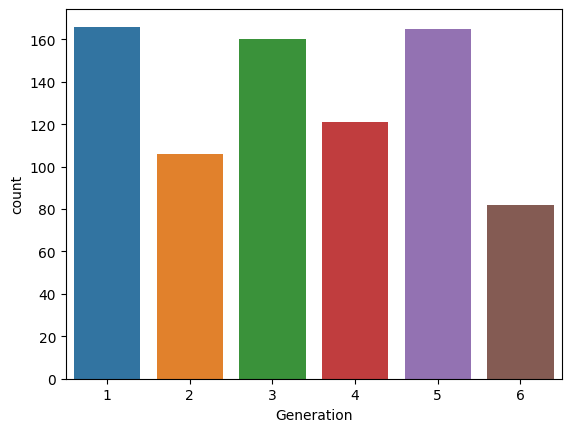

In [14]:
sns.countplot(df, x="Generation")


<Axes: xlabel='Legendary', ylabel='count'>

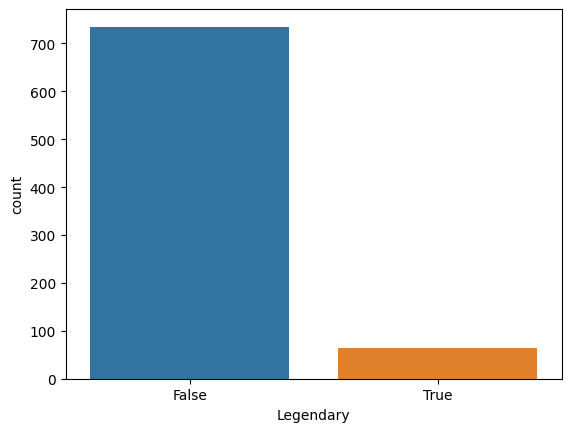

In [15]:
sns.countplot(df, x="Legendary")


In [16]:
con_cols = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
cat_cols = ["Name", "Type 1", "Type 2", "Generation", "Legendary"]


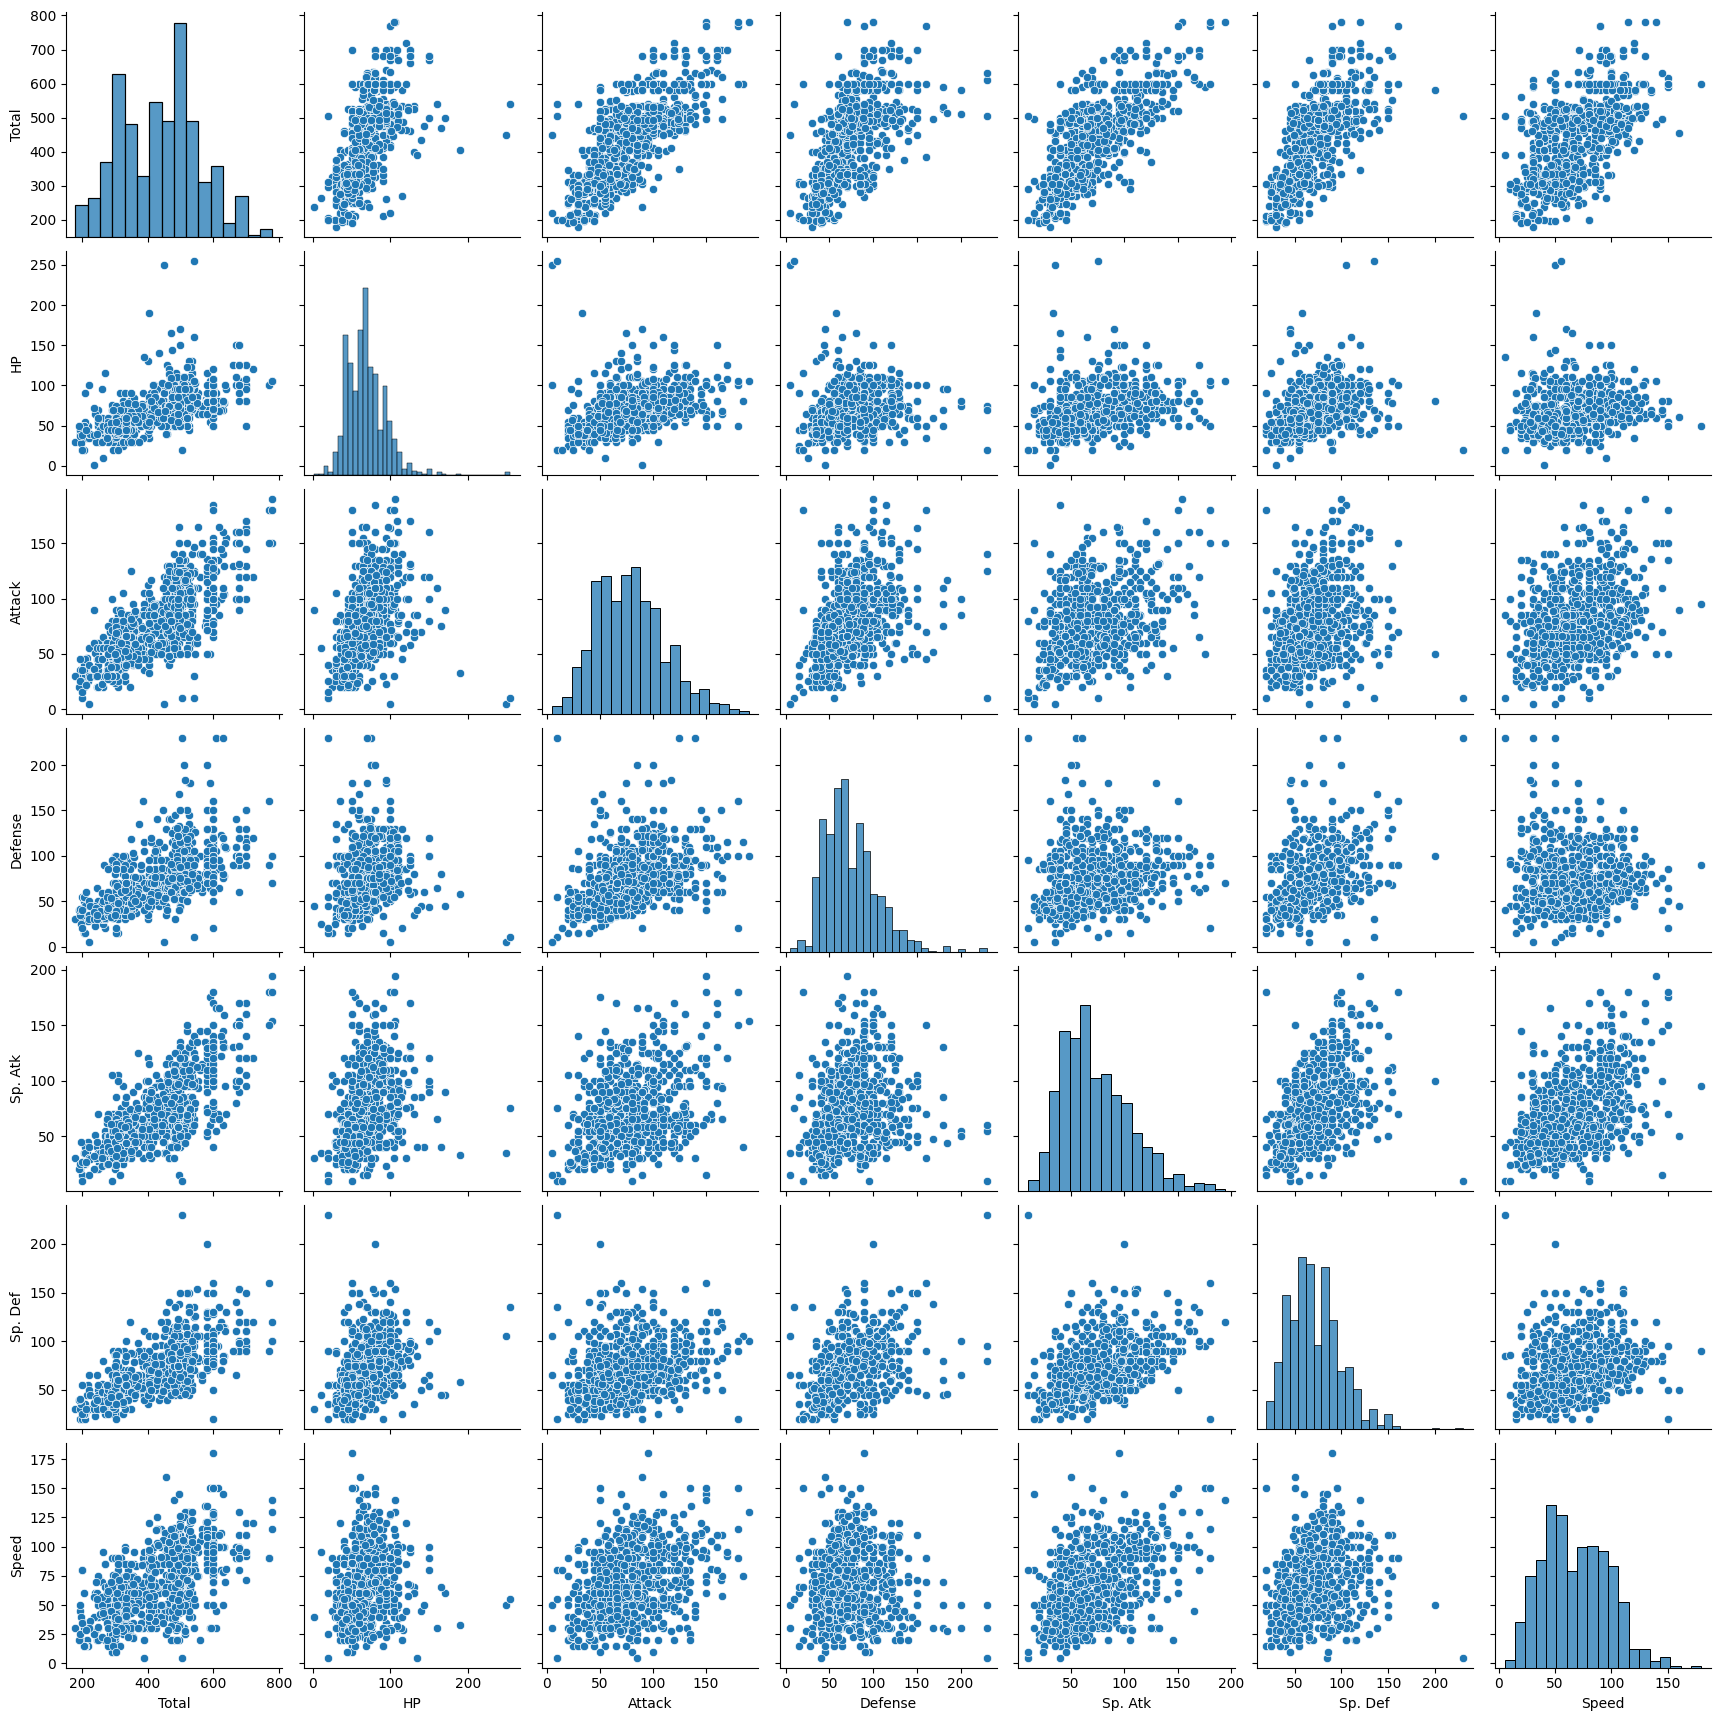

In [17]:
sns.pairplot(df[con_cols])


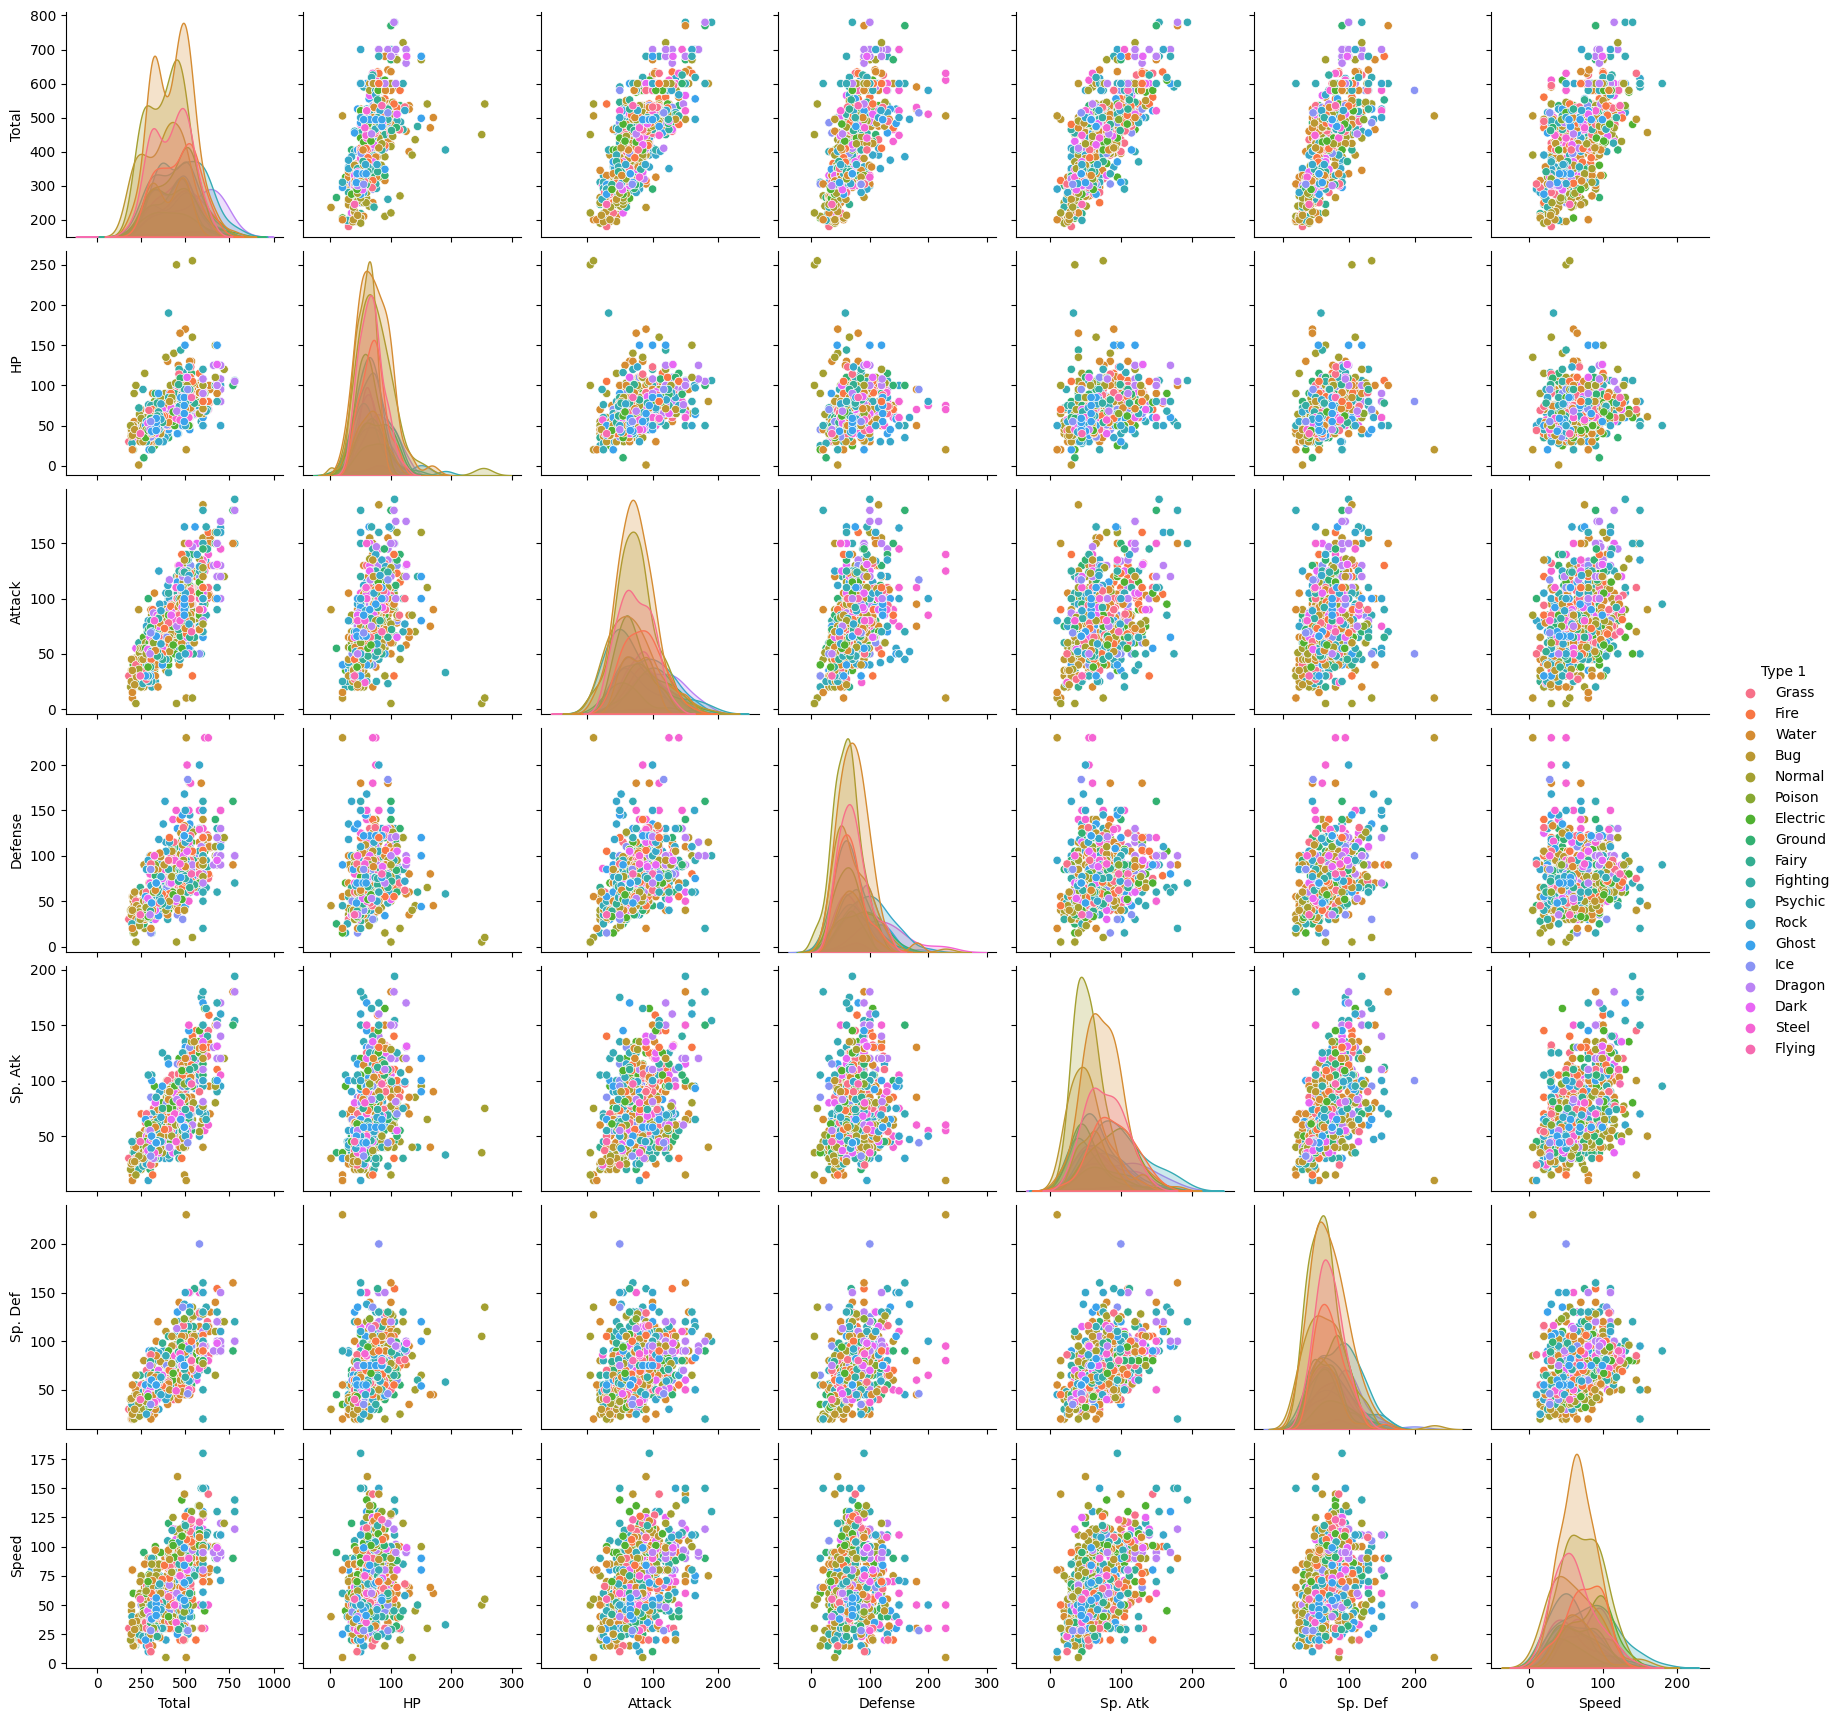

In [18]:
sns.pairplot(df[con_cols + ["Type 1"]], hue="Type 1")


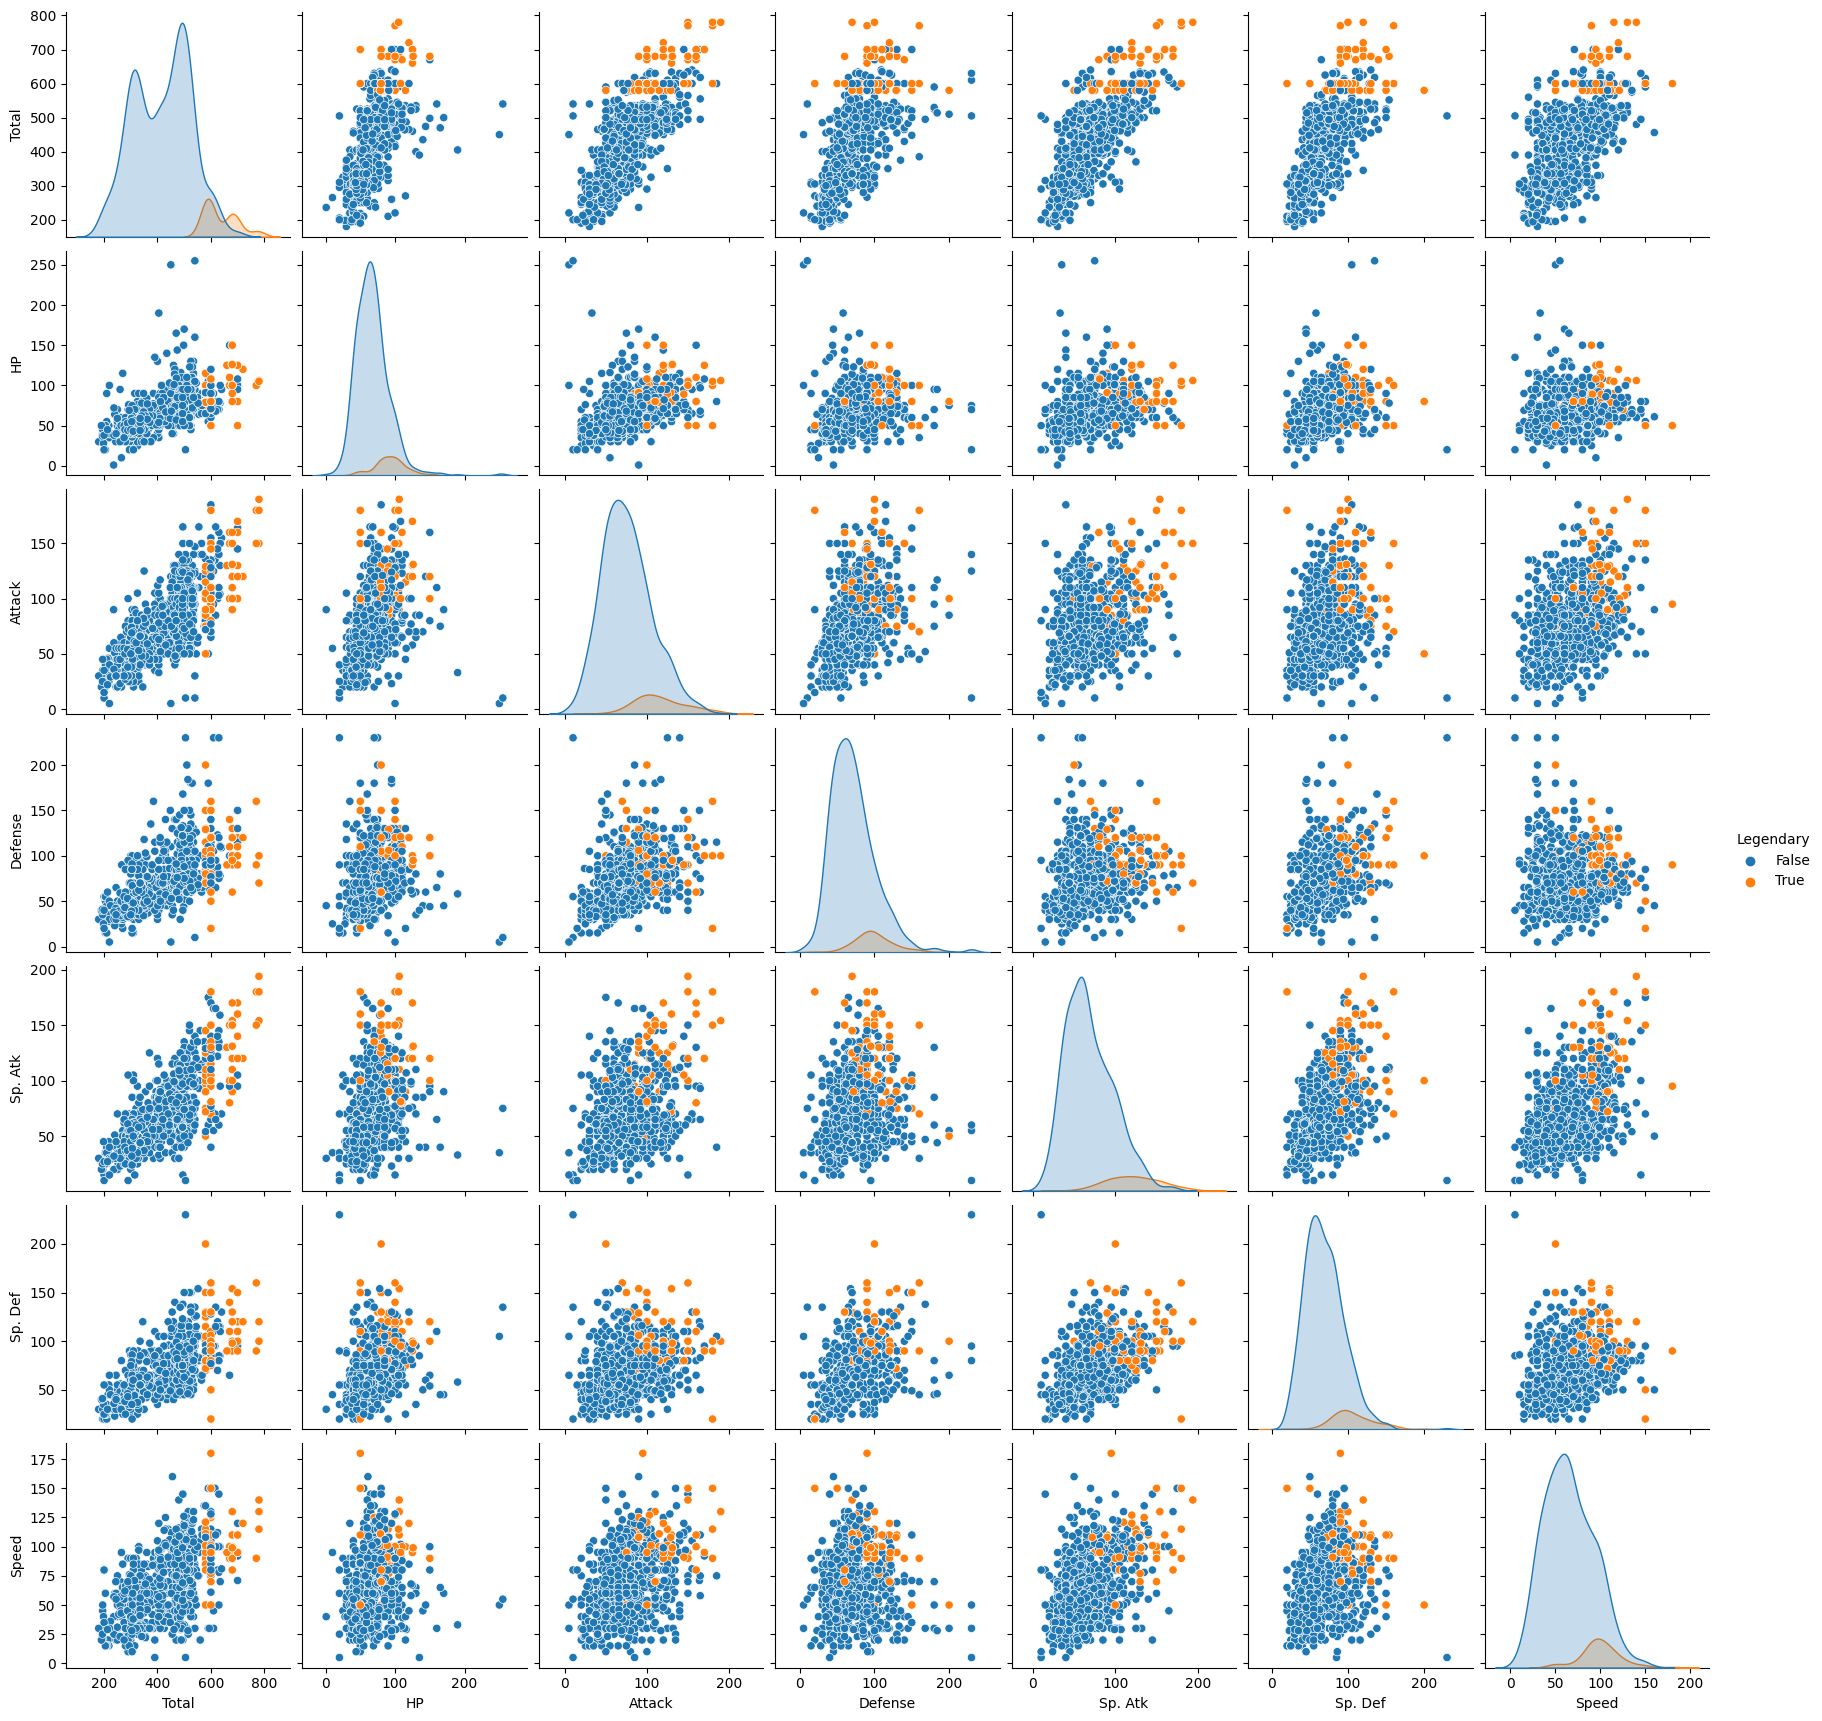

In [19]:
sns.pairplot(df[con_cols + ["Legendary"]], hue="Legendary")


<Axes: >

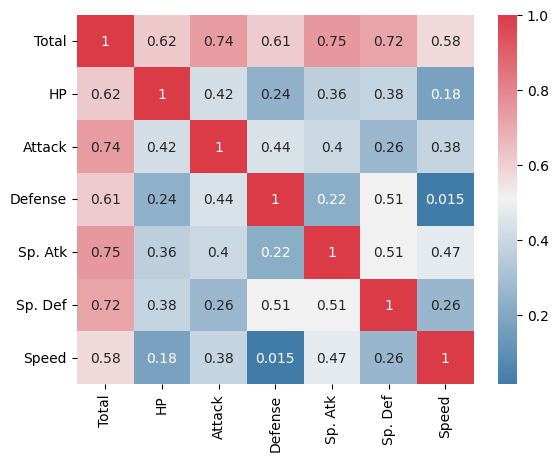

In [20]:
plt.xticks(rotation=90)
sns.heatmap(
    df[con_cols].corr("pearson"),
    annot=True,
    cmap=sns.diverging_palette(240, 10, as_cmap=True),
)


### Dimension Reduction

In [21]:
x = StandardScaler().fit_transform(df.drop(cat_cols, axis=1))
y = df["Legendary"]


In [22]:
pca = PCA(2)

principal_components = pd.DataFrame(pca.fit_transform(x), columns=["1", "2"])
pca_df = pd.concat([principal_components, y], axis=1)

pca_df


1         2  Legendary
0   -1.840088 -0.025494      False
1   -0.443543 -0.050760      False
2    1.480309 -0.058428      False
3    3.060557  0.711939      False
4   -2.045946 -0.711499      False
..        ...       ...        ...
795  2.683327  2.309632       True
796  4.184047 -0.802227       True
797  2.806295 -0.506877       True
798  4.074115 -0.939550       True
799  2.624041  0.543753       True

[800 rows x 3 columns]

<Axes: xlabel='1', ylabel='2'>

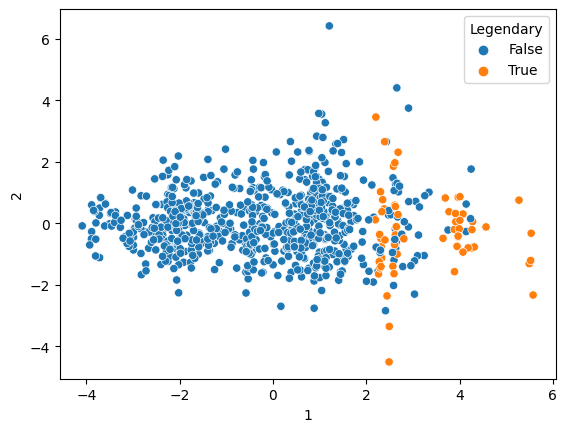

In [23]:
sns.scatterplot(data=pca_df, x="1", y="2", hue="Legendary")


### Classification

In [24]:
x = df.drop(["Name", "Legendary"], axis=1)
y = df["Legendary"]

x["Type 1"] = LabelEncoder().fit_transform(x["Type 1"])
x["Type 2"] = LabelEncoder().fit_transform(x["Type 2"])


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [26]:
models = [GaussianNB(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]

for model in models:
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)
    print(f"{model} accuracy: {model.score(x_test, y_test)}")
    print(f"{model} average precision: {average_precision_score(y_test, predicted)}")


GaussianNB() accuracy: 0.925
GaussianNB() average precision: 0.45454545454545453
LinearDiscriminantAnalysis() accuracy: 0.94375
LinearDiscriminantAnalysis() average precision: 0.39567307692307685
QuadraticDiscriminantAnalysis() accuracy: 0.95
QuadraticDiscriminantAnalysis() average precision: 0.4270833333333333


c:\Users\Stefan\anaconda3\envs\ds\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Conclusion

Не можеме да заклучиме кој модел е најдобар според прецизност, затоа што прецизноста на сите модели е многу слична. Во податочното множество, класата False се појавува многу почесто отколку класата True, па затоа е попаметно да се користи precision - recall score, дека води сметка за веројатностите за појавување на секоја класа. Така испаѓа дека НБ класификаторот е најдобар.